In [12]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import cv2
import imghdr

In [38]:
data_dir = 'data' 

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
os.listdir(os.path.join(data_dir, 'smoking'))

['0023ae98965615de6f7100.jpg',
 '02CHINASMOKING-articleLarge.jpg',
 '03-1.jpg',
 '08xqr_WLH4ypiS5id.jpg',
 '0ce925f9f549869834d1794048d8d7f7.jpg',
 '101830709-73160938.jpg',
 '104388228-GettyImages-175127122_1.jpg',
 '1200pxsmoking_cigarette_by_lindsay_fox-1-824x549.jpg',
 '12SMOKING-3-mobileMasterAt3x.jpg',
 '140507143542-cigarette-smoker.jpg',
 '141230-smoking-cigarette-mn-1300.JPG.jpg',
 '150513-smoking-cigarette-jpo-508p.jpg',
 '151331783.jpg',
 '151522649.jpg',
 '1581-nicotine_poisoning-732x549-thumbnail.jpg',
 '1_240662_1_5.jpeg',
 '2022-07-01.jpg',
 '21EF7630-B303-46D7-A21823F6C5C4C108_source.jpg',
 '220px-Smoke_283494242265229.jpg',
 '222BB81D-E6F2-44AD-B151A2FC9C8B314B_source.jpg',
 '2542432-untitled-design-2022-09-29t183023.708.jpg',
 '26xp-smoking2-superJumbo.jpg',
 '2Fmethode2Ftimes2Fprod2Fweb2Fbin2F79974148-dea7-11e7-872d-4b5e82b139be.jpg',
 '30928.jpg',
 '49437329_905.jpg',
 '58912945.jpg',
 '636649709698239221-AFP-AFP-1674BZ.jpg',
 '6C7713549-RTXDICG.jpg',
 '71656.jpg',


In [17]:
img=cv2.imread(os.path.join('data','non_smoking','-close-up-joyful-man-standing-in-shirt-at-street_ruad1d71u_thumbnail-1080_01.png'))
img.shape

(1080, 1920, 3)

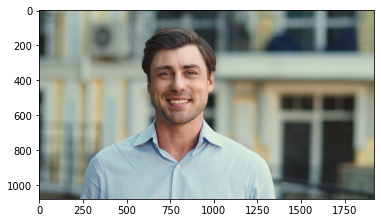

In [19]:
#plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Image not in ext list data\smoking\passive-smoking-concept-man-cigarette-260nw-1376604434.jpg
Image not in ext list data\smoking\people-smoking-cigarettes-streets-tokyo-059935122_prevstill.jpeg
Image not in ext list data\smoking\person-smoking-ecigarette-1069317828-770x533-1.jpg
Image not in ext list data\smoking\why-do-people-smoke-01.jpg
Image not in ext list data\smoking\young-people-smoking-outdoors-sitting-260nw-1571491495.jpg
Image not in ext list data\smoking\young_woman_vaping-e1583456493783.gif


In [11]:
len('D:\\Coding\\projects\\DeepLearning\\smoking_detection\\data\\non_smoking')

66

In [39]:
data = tf.keras.utils.image_dataset_from_directory('data')
#data pipeline

Found 505 files belonging to 2 classes.


In [40]:
data_iterator = data.as_numpy_iterator()
#ALLOWS ACCESS FROM PIPELINE (looping)

In [41]:
#grabbing a batch
batch=data_iterator.next()

In [42]:
len(batch)
#2 parts to the data-imgs and labels

2

In [43]:
batch[0].shape

(32, 256, 256, 3)

In [25]:
tf.keras.utils.image_dataset_from_directory??
#makes the images uniform

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



finding labels
#### 1-smoking, 0-non smoking

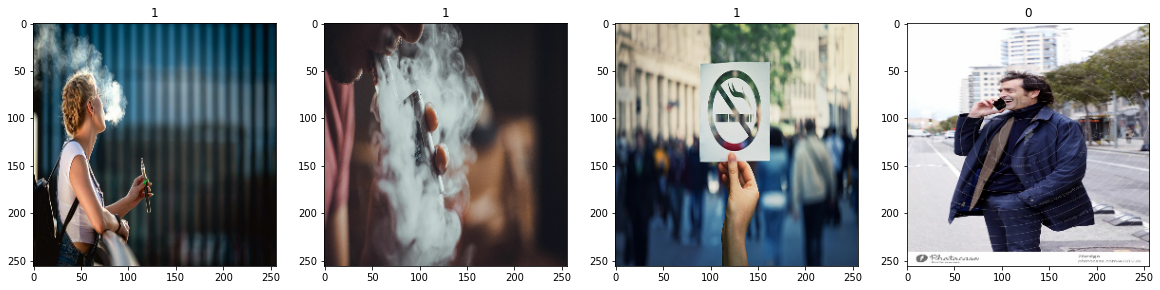

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [32]:
batch[0].min()

0.0

Data Scaling

In [45]:
data = data.map(lambda x,y: (x/255, y))

In [47]:
data.as_numpy_iterator().next()[0].max()

1.0

In [ ]:
# batch=data.as_numpy_iterator().next()[0].max()
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

Splitting 

In [48]:
len(data)

16

In [63]:
0.2*16

3.2

In [64]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [65]:
val_size

3

In [66]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Deep learning

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [68]:
model = Sequential()

In [69]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [70]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [72]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [73]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 [==============================] - 56s 4s/step - loss: 0.8419 - accuracy: 0.5426 - val_loss: 0.6890 - val_accuracy: 0.5521
Epoch 2/20
11/11 [==============================] - 27s 2s/step - loss: 0.6814 - accuracy: 0.5824 - val_loss: 0.6214 - val_accuracy: 0.7292
Epoch 3/20
11/11 [==============================] - 27s 2s/step - loss: 0.6096 - accuracy: 0.7159 - val_loss: 0.5028 - val_accuracy: 0.7917
Epoch 4/20
11/11 [==============================] - 30s 3s/step - loss: 0.4948 - accuracy: 0.7756 - val_loss: 0.3592 - val_accuracy: 0.9167
Epoch 5/20
11/11 [==============================] - 33s 3s/step - loss: 0.3476 - accuracy: 0.8750 - val_loss: 0.4177 - val_accuracy: 0.8542
Epoch 6/20
11/11 [==============================] - 32s 3s/step - loss: 0.2878 - accuracy: 0.9006 - val_loss: 0.3189 - val_accuracy: 0.8750
Epoch 7/20
11/11 [==============================] - 33s 3s/step - loss: 0.2130 - accuracy: 0.9290 - val_loss: 0.1892 - val_accuracy: 0.9271
Epoch 8/20
11/11 [==

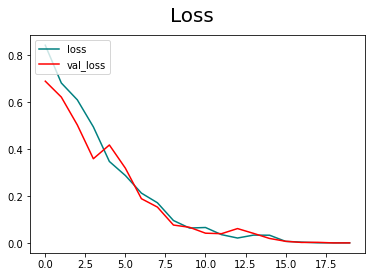

In [74]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

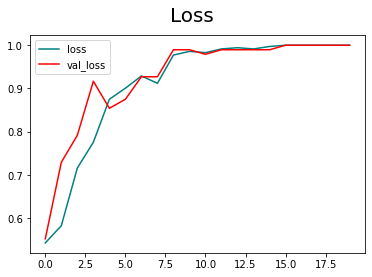

In [77]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='loss')
plt.plot(hist.history['val_accuracy'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [78]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [79]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [80]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    t_data = model.predict(X)
    pre.update_state(y, t_data)
    re.update_state(y, t_data)
    acc.update_state(y, t_data)

1/1 [==============================] - 1s 552ms/step


In [81]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


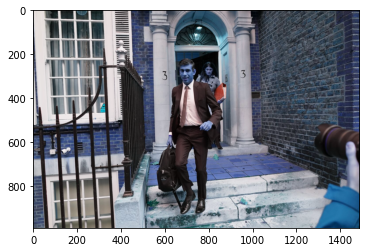

In [110]:
img = cv2.imread('nsm3.jpg')
plt.imshow(img)
plt.show()

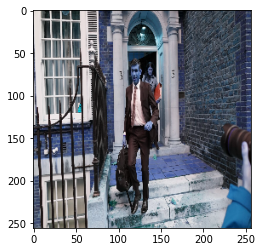

In [111]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [112]:
t_data= model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 72ms/step


In [113]:
if t_data > 0.5: 
    print(f'Predicted class is smoking')
else:
    print(f'Predicted class is not smoking')

Predicted class is not smoking


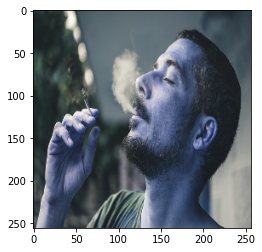

In [115]:
img = cv2.imread('sm1.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [116]:
t_data= model.predict(np.expand_dims(resize/255, 0))
if t_data > 0.5: 
    print(f'Predicted class is smoking')
else:
    print(f'Predicted class is not smoking')

1/1 [==============================] - 0s 168ms/step
Predicted class is smoking
